# Monte Carlo Simulations #

Monte Carlo simulation is a technique used to perform sensitivity analysis, that is, study how a model responds to randomly generated inputs. It typically involves a three-step process:

1. Randomly generate "N" inputs;
2. Run a simulation for each of the "N" inputs. Simulations are run on a computerised model of the system being analysed;
3. Aggregate and assess the outputs from the simulations. Common measures include the mean value of an output, the distribution of output values, and the minimum or maximum output value.

When is a simulation a Monte Carlo simulation and when is it just random sampling a parameter? If the simulation involves generating random numbers to simulate the behavior of a system, running a large number of simulations, and analyzing the results statistically, it's a Monte Carlo simulation. If the simulation involves selecting a subset of individuals from a population to estimate characteristics of the population, it's random sampling.

### Resources ###
- https://uk.mathworks.com/discovery/monte-carlo-simulation.html
- https://uk.mathworks.com/matlabcentral/fileexchange/55306-monte-carlo-estimation-examples-with-matlab#version_history_tab
- MIT OpenCourseWare: 6. Monte Carlo Simulation by John Guttag

### Monte Carlo vs Bootstrapping ###
Monte Carlo Simulation and Bootstrapping are both resampling techniques used in statistical analysis, but they are used for different purposes and in different contexts:

1. **Monte Carlo Simulation**: This is a computational technique that uses random sampling to simulate complex systems and processes, and to estimate the distribution of possible outcomes. It's often used when the system or process is difficult or impossible to model analytically. The Monte Carlo method involves generating a large number of scenarios for the system or process, each time using randomly selected values for the uncertain variables, and then analyzing the distribution of the outcomes.

2. **Bootstrapping**: This is a statistical method that resamples a single dataset to create many simulated samples. This process allows you to calculate standard errors, construct confidence intervals, and perform hypothesis testing for numerous types of sample estimates. Bootstrapping can be used to estimate the precision of sample statistics (medians, variances, percentiles) by using subsets of available data as resampling. 

In summary, Monte Carlo simulation is a method for simulating complex systems and processes and estimating the distribution of possible outcomes, while bootstrapping is a method for estimating the sampling distribution of a statistic by resampling from the original sample.

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Playing Roulette (based on MIT lecture 6.)
class FairRoulette():
    def __init__(self):
        self.pockets = []
        for i in range(1, 37):
            self.pockets.append(i)
        self.ball = None
        self.pocketOdds = len(self.pockets) - 1  # if you make a bet, this tells you what your odds are. Fair game.

    def spin(self):
        self.ball = self.pockets[random.choice(range(0, 36))]

    def betPocket(self, pocket, amt):
        if str(pocket) == str(self.ball):
            return amt * self.pocketOdds
        else:
            return -amt

    def __str__(self):
        return 'Fair Roulette'
    
def playRoulette(game, numSpins, pocket, bet, toPrint):
    totPocket = 0
    for i in range(numSpins):
        game.spin()
        totPocket += game.betPocket(pocket, bet)
    if toPrint:
        print(numSpins, 'spins of', game)
        print('Expected return betting', pocket, '=', str(100*totPocket/numSpins) + '%\n')
    return (totPocket/numSpins)

game = FairRoulette()
for numSpins in (100, 1000000):
    for i in range(3):
        playRoulette(game, numSpins, 2, 1, True)

# when spinning a million times, the expectation is close to 0.0, which is what we expect from a fair game. 
# But when you spin 100 times, the expectation is not close to 0.0. This is because of the law of large numbers. 
# The more you play, the closer you get to the expected value.

100 spins of Fair Roulette
Expected return betting 2 = -28.0%

100 spins of Fair Roulette
Expected return betting 2 = -28.0%

100 spins of Fair Roulette
Expected return betting 2 = 8.0%

1000000 spins of Fair Roulette
Expected return betting 2 = -0.5644%

1000000 spins of Fair Roulette
Expected return betting 2 = -0.2908%

1000000 spins of Fair Roulette
Expected return betting 2 = -0.19%



In [3]:
# European Roulette adds a 0 and an extra bet, which makes the game unfair.
# American Roulette adds a 00 and an extra bet, which makes the game even more unfair.

class EuRoulette(FairRoulette):
    def __init__(self):
        FairRoulette.__init__(self)
        self.pockets.append('0')
    def __str__(self):
        return 'European Roulette'
    
class AmRoulette(EuRoulette):
    def __init__(self):
        EuRoulette.__init__(self)
        self.pockets.append('00')
    def __str__(self):
        return 'American Roulette'
    
game = EuRoulette()
for numSpins in (100, 1000000):
    for i in range(3):
        playRoulette(game, numSpins, 2, 1, True)

game = AmRoulette()
for numSpins in (100, 1000000):
    for i in range(3):
        playRoulette(game, numSpins, 2, 1, True)

100 spins of European Roulette
Expected return betting 2 = 80.0%

100 spins of European Roulette
Expected return betting 2 = 8.0%

100 spins of European Roulette
Expected return betting 2 = -28.0%

1000000 spins of European Roulette
Expected return betting 2 = 0.0548%

1000000 spins of European Roulette
Expected return betting 2 = -0.6292%

1000000 spins of European Roulette
Expected return betting 2 = 0.4184%

100 spins of American Roulette
Expected return betting 2 = -28.0%

100 spins of American Roulette
Expected return betting 2 = 44.0%

100 spins of American Roulette
Expected return betting 2 = 80.0%

1000000 spins of American Roulette
Expected return betting 2 = -0.5212%

1000000 spins of American Roulette
Expected return betting 2 = -0.0316%

1000000 spins of American Roulette
Expected return betting 2 = -0.6292%



In [4]:
# Applying Empirical Rule to Roulette
def findPocketReturn(game, numTrials, trialSize, toPrint):
    pocketReturns = []
    for t in range(numTrials):
        trialVals = playRoulette(game, trialSize, 2, 1, toPrint)
        pocketReturns.append(trialVals)
    return pocketReturns

def getMeanAndStd(X):
    mean = sum(X)/len(X)
    tot = 0.0
    for x in X:
        tot += (x - mean)**2
    std = (tot/len(X))**0.5
    return mean, std

resultDict = {}
games = (FairRoulette, EuRoulette, AmRoulette)

for G in games:
    resultDict[G().__str__()] = []

for numSpins in (100, 1000, 1000000):
    print('\nSimulate', numSpins, 'spins of the roulette')
    for G in games:
        pocketReturn = findPocketReturn(G(), 20, numSpins, False)
        mean, std = getMeanAndStd(pocketReturn)
        resultDict[G().__str__()].append((numSpins, 100*mean, 100*std))
        print('Exp. return for', G(), '=', str(round(100*mean, 3)) + '%,', '+/- ' + str(round(100*1.96*std, 3)) + '% with 95% confidence')

# The empirical rule states that 95% of the data falls within 2 standard deviations of the mean.
# The empirical rule is not always accurate, but it is a good rule of thumb.
# What you should see is that the confidence interval of the fair roulette is smaller compared to the EU and US roulette when you simulate a million spins.


Simulate 100 spins of the roulette
Exp. return for Fair Roulette = -2.8%, +/- 109.539% with 95% confidence
Exp. return for European Roulette = -6.4%, +/- 98.279% with 95% confidence
Exp. return for American Roulette = -8.2%, +/- 140.191% with 95% confidence

Simulate 1000 spins of the roulette
Exp. return for Fair Roulette = -1.0%, +/- 31.038% with 95% confidence
Exp. return for European Roulette = -6.4%, +/- 27.69% with 95% confidence
Exp. return for American Roulette = -2.26%, +/- 31.891% with 95% confidence

Simulate 1000000 spins of the roulette
Exp. return for Fair Roulette = -0.001%, +/- 1.124% with 95% confidence
Exp. return for European Roulette = 0.065%, +/- 1.088% with 95% confidence
Exp. return for American Roulette = 0.121%, +/- 1.409% with 95% confidence


The Monte Carlo simulation does not always assume normally distributed data. The distribution assumption in a Monte Carlo simulation depends on the specific problem and the nature of the variables involved.

Monte Carlo simulations can be used with any type of probability distribution, as long as it accurately represents the uncertainty of the variable being modeled. This could be a normal distribution, but it could also be a uniform distribution, exponential distribution, binomial distribution, Poisson distribution, or any other type of distribution.

In fact, one of the strengths of Monte Carlo simulations is their ability to handle complex systems with multiple variables that follow different types of distributions, and to model the interactions between these variables.

Graphical dipiction of Monte Carlo: https://www.researchgate.net/profile/Elisabeth-Bui/publication/241336751/figure/fig9/AS:668215218806790@1536326331626/Graphical-depiction-of-the-Monte-Carlo-simulation-procedure.png

# Monte Carlo in Neuroscience #

Basically, monte carlo is just running an algorithm a couple of times where parameters are pulled from a certain distribution

Here, I'm simulating the firing rate of a neuron


In [5]:
num_simulations = 1000
firing_threshold = 0.5
resting_potential = 0
input_mean = 1
input_std = 2

firing_rates = []

# run Monte Carlo Simulation
for _ in range(num_simulations):
    # initialise neuron with resting potential
    neuron_potential = resting_potential

    # initialise a counter for the number of firings
    firings = 0

    # Simulate the neuron's behaviour over time
    for _ in range(1000):
        # add random input to the neuron
        neuron_potential += np.random.normal(input_mean, input_std)

        # check if the neuron has fired
        if neuron_potential >= firing_threshold:
            # increment the firing counter
            firings += 1

            # reset the neuron's potential
            neuron_potential = resting_potential

    # calculate the firing rate
    firing_rate = firings / 1000  # assume 1 time step = 1 ms

    # store the firing rate
    firing_rates.append(firing_rate)

# calculate the mean and standard deviation of the firing rates
mean_firing_rate = np.mean(firing_rates)
std_firing_rate = np.std(firing_rates)

print(f"The mean firing rate is {mean_firing_rate:.2f} with a standard deviation of {std_firing_rate:.2f}")



The mean firing rate is 0.45 with a standard deviation of 0.03


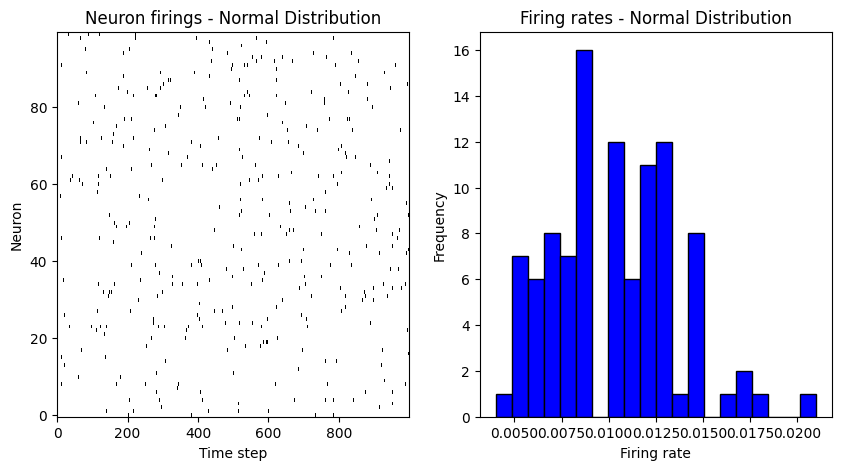

In [6]:
# This is with a Normal Distribution
num_neurons = 100 
num_time_steps = 1000  
firing_probability = 0.01

# Initialize an array to store the firing of the neurons
firings = np.zeros((num_neurons, num_time_steps))

# Run the Monte Carlo simulation
for i in range(num_neurons):
    for j in range(num_time_steps):
        # Determine whether the neuron fires
        fires = np.random.rand() < firing_probability

        # Store the firing of the neuron
        firings[i, j] = fires

# Plot the firing of the neurons
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(firings, aspect='auto', cmap='binary', interpolation='none', origin='lower')
ax[0].set_xlabel('Time step')
ax[0].set_ylabel('Neuron')
ax[0].set_title('Neuron firings - Normal Distribution')

# Calculate the firing rate of each neuron
firing_rates = np.mean(firings, axis=1)

# Plot the firing rates
ax[1].hist(firing_rates, bins=20, color='b', edgecolor='k')
ax[1].set_xlabel('Firing rate')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Firing rates - Normal Distribution')

plt.show()

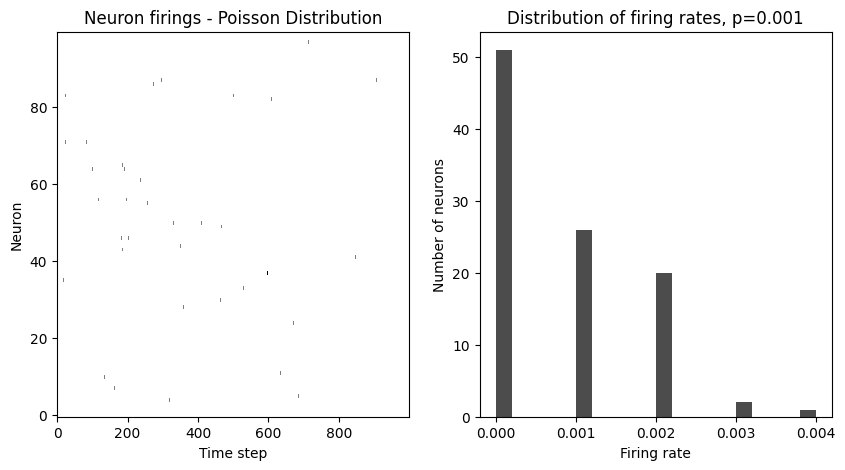

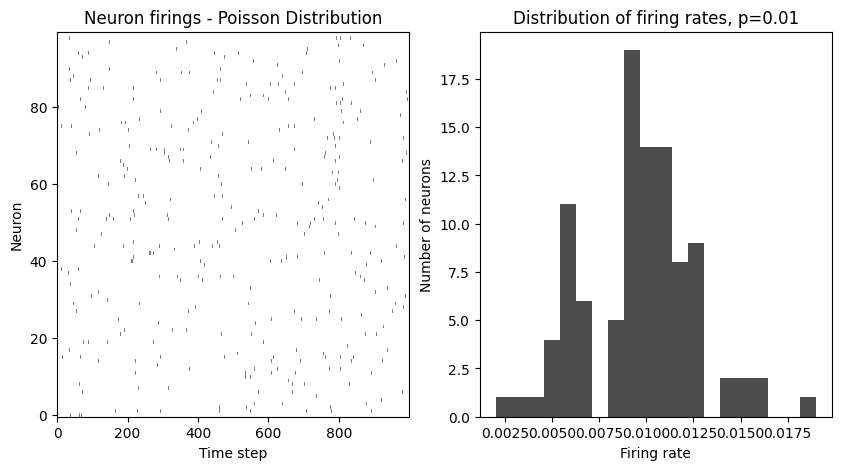

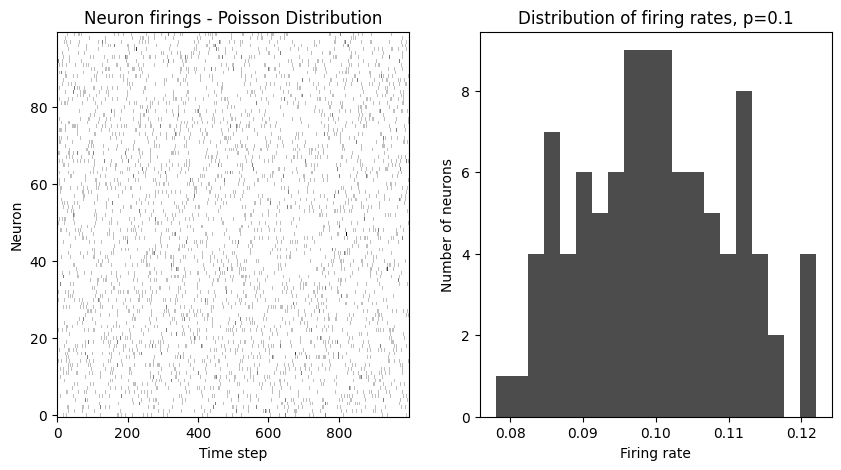

In [7]:
# Use Monte Carlo now with Poisson Distribution
num_neurons = 100 
num_time_steps = 1000
firing_probability = [0.001, 0.01, 0.1]

for p in firing_probability:
    # Initialize an array to store the firing of the neurons
    firings = np.zeros((num_neurons, num_time_steps))

    # Run the Monte Carlo simulation with Poisson Distribution
    for i in range(num_neurons):
        for j in range(num_time_steps):
            # Determine whether the neuron fires
            fires = np.random.poisson(p)

            # Store the firing of the neuron
            firings[i, j] = fires

    # Plot the firing of the neurons
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(firings, aspect='auto', cmap='binary', interpolation='none', origin='lower')
    ax[0].set_xlabel('Time step')
    ax[0].set_ylabel('Neuron')
    ax[0].set_title('Neuron firings - Poisson Distribution')

    # And plot distribution of firing rates
    firing_rates = np.sum(firings, axis=1) / num_time_steps
    ax[1].hist(firing_rates, bins=20, color='k', alpha=0.7)
    ax[1].set_xlabel('Firing rate')
    ax[1].set_ylabel('Number of neurons')
    ax[1].set_title(f'Distribution of firing rates, p={p}')
    plt.show()


# Monte Carlo simulation in Optics #

This first script simulates the scattering of photons by generating random steps from a normal distribution, and updating the photons' positions accordingly. The final position of each photon is stored, and the mean and standard deviation of the final positions are calculated at the end. This can give insights into how far photons might scatter in the medium over a given period of time.

The last script simulates the trajectories of photons by generating random steps from a normal distribution, and updating the photons' positions accordingly. The position of each photon at each time step is stored in the trajectories array. The trajectories of the photons are then plotted using matplotlib.

In [8]:
num_photons = 10000  # Number of photons to simulate
scattering_coefficient = 0.1  # Scattering coefficient of the medium

# Initialize an array to store the final positions of the photons
final_positions = np.zeros(num_photons)

# Run the Monte Carlo simulations
for i in range(num_photons):
    # Initialize the photon's position
    position = 0

    # Simulate the photon's behavior over time
    for _ in range(1000):  # Assume 1000 time steps
        # Generate a random step
        step = np.random.normal(0, scattering_coefficient)

        # Update the photon's position
        position += step

    # Store the final position of the photon
    final_positions[i] = position

# Calculate the mean and standard deviation of the final positions
mean_position = np.mean(final_positions)
std_position = np.std(final_positions)

print(f"Mean final position: {mean_position}")
print(f"Standard deviation of final position: {std_position}")

Mean final position: 0.01937437663760637
Standard deviation of final position: 3.1785115376405164


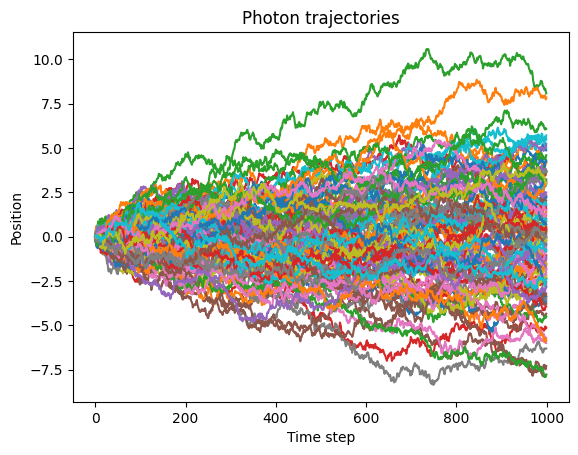

In [9]:
num_photons = 100  # Number of photons to simulate
num_steps = 1000  # Number of steps to simulate
scattering_coefficient = 0.1  # Scattering coefficient of the medium

# Initialize an array to store the trajectories of the photons
trajectories = np.zeros((num_photons, num_steps))

# Run the Monte Carlo simulations
for i in range(num_photons):
    # Initialize the photon's position
    position = 0

    # Simulate the photon's behavior over time
    for j in range(num_steps):
        # Generate a random step
        step = np.random.normal(0, scattering_coefficient)

        # Update the photon's position
        position += step

        # Store the position of the photon
        trajectories[i, j] = position

# Plot the trajectories of the photons
for i in range(num_photons):
    plt.plot(trajectories[i, :], label=f'Photon {i+1}')

plt.xlabel('Time step')
plt.ylabel('Position')
plt.title('Photon trajectories')
# plt.legend()
plt.show()